In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

import os    
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

In [2]:
train_dir = 'dataset1/training_set'
test_dir = 'dataset1/test_set'

In [3]:
IMAGE_SIZE = (224,224)
BATCH_SIZE = 32

train_ds = tf.keras.utils.image_dataset_from_directory(train_dir,
                                                      validation_split=0.2,
                                                      subset='training',
                                                      batch_size=BATCH_SIZE,
                                                      image_size=IMAGE_SIZE,
                                                      seed=123)

valid_ds = tf.keras.utils.image_dataset_from_directory(train_dir,
                                                      validation_split=0.2,
                                                      subset='validation',
                                                      batch_size=BATCH_SIZE,
                                                      image_size=IMAGE_SIZE,
                                                      seed=123)

test_t = tf.keras.utils.image_dataset_from_directory(test_dir,
                                                    batch_size=BATCH_SIZE,
                                                    image_size=IMAGE_SIZE)

Found 240 files belonging to 2 classes.
Using 192 files for training.
Found 240 files belonging to 2 classes.
Using 48 files for validation.
Found 34 files belonging to 2 classes.


In [4]:
num_classes = len(train_ds.class_names)

## Transfer Learning

In [5]:
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2, preprocess_input

In [6]:
# Creating base model from Pretrained InceptionResNetV2 model
base_model = InceptionResNetV2(weights='imagenet', include_top=False,
                              input_shape=(224,224,3))

x = base_model.output
# Rebuilding the top layer
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(100, activation='relu')(x)
predictions = tf.keras.layers.Dense(1, activation='sigmoid', 
                                    kernel_initializer='random_uniform')(x)

# Creating New model object
model = tf.keras.models.Model(inputs=base_model.input, outputs=predictions)
# freezing the base model
base_model.trainable = False

optimizer = tf.keras.optimizers.Adam()

# Compiling the model
model.compile(optimizer=optimizer, loss='binary_crossentropy', 
              metrics=['accuracy'])

In [7]:
epochs = 100


callbacks_list = [
    tf.keras.callbacks.ModelCheckpoint(
    filepath='transfer_learning_model.h5',
    monitor='val_loss',
    save_best_only=True,
    verbose=1),
    
    tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=10,
    verbose=1)
]



history = model.fit(train_ds, epochs=epochs, callbacks=callbacks_list, 
                    validation_data=valid_ds)

Epoch 1/100
6/6 [==============================] - ETA: 0s - loss: 433.6344 - accuracy: 0.5365
Epoch 1: val_loss improved from inf to 377.57541, saving model to transfer_learning_model.h5
6/6 [==============================] - 39s 5s/step - loss: 433.6344 - accuracy: 0.5365 - val_loss: 377.5754 - val_accuracy: 0.5417
Epoch 2/100
6/6 [==============================] - ETA: 0s - loss: 300.1014 - accuracy: 0.4896
Epoch 2: val_loss improved from 377.57541 to 68.88226, saving model to transfer_learning_model.h5
6/6 [==============================] - 22s 4s/step - loss: 300.1014 - accuracy: 0.4896 - val_loss: 68.8823 - val_accuracy: 0.5417
Epoch 3/100
6/6 [==============================] - ETA: 0s - loss: 23.5205 - accuracy: 0.4896
Epoch 3: val_loss improved from 68.88226 to 0.69345, saving model to transfer_learning_model.h5
6/6 [==============================] - 25s 5s/step - loss: 23.5205 - accuracy: 0.4896 - val_loss: 0.6935 - val_accuracy: 0.4583
Epoch 4/100
6/6 [=======================

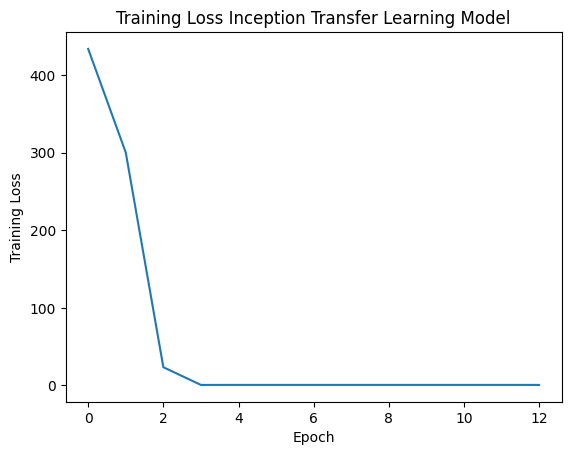

In [8]:
plt.plot(history.history['loss'])
plt.title('Training Loss Inception Transfer Learning Model')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.show()

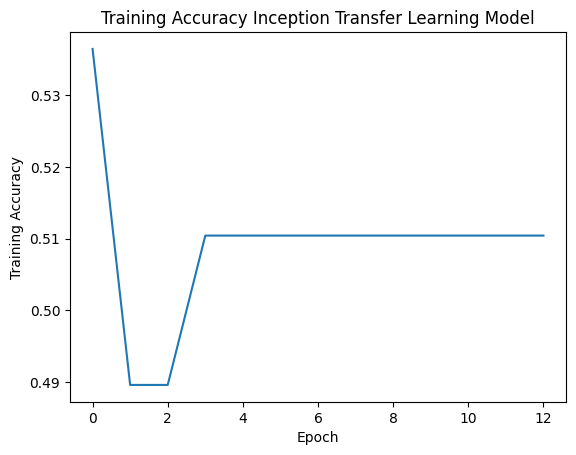

In [9]:
plt.plot(history.history['accuracy'])
plt.title('Training Accuracy Inception Transfer Learning Model')
plt.xlabel('Epoch')
plt.ylabel('Training Accuracy')
plt.show()

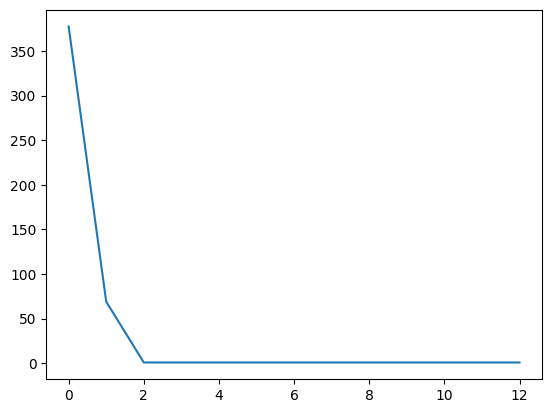

In [10]:
plt.plot(history.history['val_loss'])

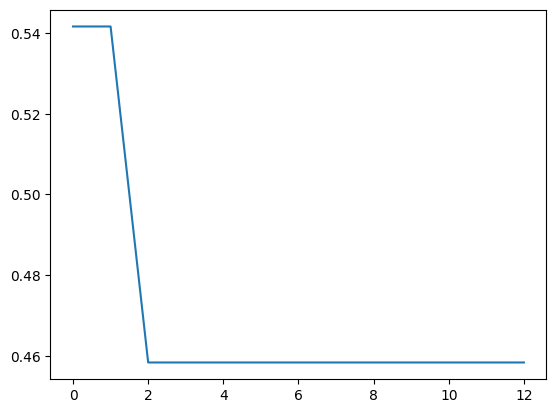

In [11]:
plt.plot(history.history['val_accuracy'])

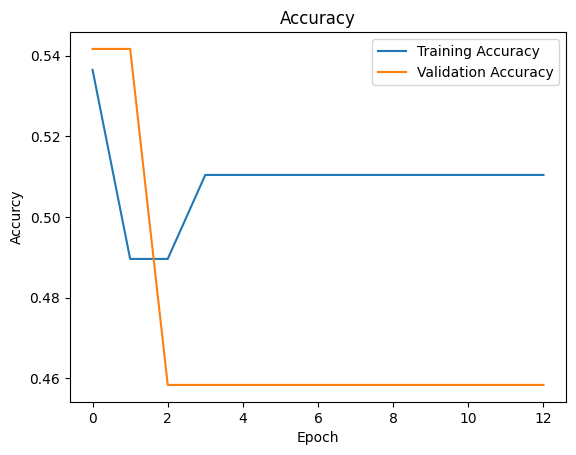

In [12]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accurcy')
plt.legend()
plt.show()

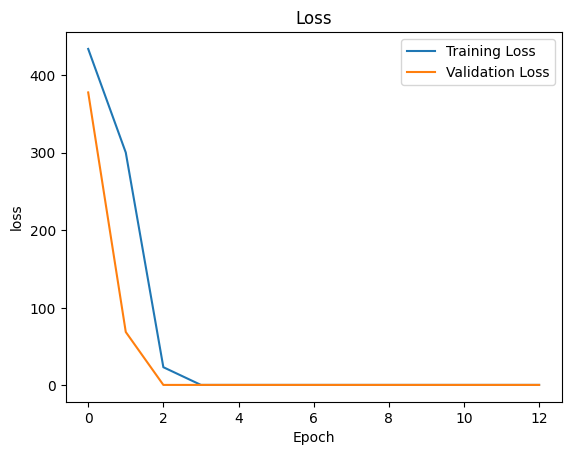

In [13]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

In [14]:
model.evaluate(test_t)

2/2 [==============================] - 4s 429ms/step - loss: 0.6932 - accuracy: 0.5000


[0.6931713223457336, 0.5]